In [1]:
import extract_data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py
from scipy.signal import filtfilt, butter, iirnotch, welch
import math
from collections import deque
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [5]:
data_train, words_train, starts_train, ends_train = extract_data.extract_data(r"C:\Users\lwing\Downloads\College\Spring 2022\Senior Design II\SilentSpeechDAS\fEMGData\mouthed_YN_6_set1.txt", r"C:\Users\lwing\Downloads\College\Spring 2022\Senior Design II\silent-speech\scripts\Mouthed_YN_6_set1.txt")
data_test, words_test, starts_test, ends_test = extract_data.extract_data(r"C:\Users\lwing\Downloads\College\Spring 2022\Senior Design II\SilentSpeechDAS\fEMGData\mouthed_YN_6_set2.txt", r"C:\Users\lwing\Downloads\College\Spring 2022\Senior Design II\silent-speech\scripts\Mouthed_YN_6_set2.txt")


2022-04-01T15:46:15.136-05
2022-04-01T15:54:50.255-05


In [6]:
chan_1_test = data_test[:,0]
chan_2_test = data_test[:,1]
chan_3_test = data_test[:,2]
chan_4_test = data_test[:,3]
chan_5_test = data_test[:,4]
chan_6_test = data_test[:,5]
channel_data_test = [chan_1_test, chan_2_test, chan_3_test, chan_4_test, chan_5_test, chan_6_test]

In [7]:
chan_1_train = data_train[:,0]
chan_2_train = data_train[:,1]
chan_3_train = data_train[:,2]
chan_4_train = data_train[:,3]
chan_5_train = data_train[:,4]
chan_6_train = data_train[:,5]
channel_data_train = [chan_1_train, chan_2_train, chan_3_train, chan_4_train, chan_5_train, chan_6_train]

### Creating target variable list

In [9]:
len(chan_1_train)

111900

In [10]:
len(chan_1_test)

109200

In [11]:
y_train = np.zeros(111900)
y_test = np.zeros(109200)

In [12]:
for i in range(len(starts_train)):
    y_train[starts_train[i]:ends_train[i]+1] = 1

In [13]:
for i in range(len(starts_test)):
    y_test[starts_test[i]:ends_test[i]+1] = 1

In [14]:
print(np.count_nonzero(y_train))
print(np.count_nonzero(y_test))

25702
17452


In [15]:
print(len(y_train))
print(len(y_test))

111900
109200


### Filtering

In [16]:
# [Band Pass to demonstrate most prominent frequency range]
low_cutoff = 20
high_cutoff = 450

filtered_data_train = [0,0,0,0,0,0]

for idx, channel in enumerate(channel_data_train):
    signal_meancorrect = channel - np.mean(channel)
    
    #60Hz Notch Filter for Power Line Noise
    b, a = iirnotch(60, 30, 1000)
    signal_notched = filtfilt(b, a, signal_meancorrect)

    # Fourth Order Butterworth 
    b, a = butter(10, [low_cutoff, high_cutoff], fs=1000, btype='bandpass')
    signal_filtered = filtfilt(b, a, signal_notched)

    #Rectify signal
    filtered_data_train[idx] = abs(signal_filtered)

In [17]:
# [Band Pass to demonstrate most prominent frequency range]
low_cutoff = 20
high_cutoff = 450

filtered_data_test = [0,0,0,0,0,0]

for idx, channel in enumerate(channel_data_test):
    signal_meancorrect = channel - np.mean(channel)
    
    #60Hz Notch Filter for Power Line Noise
    b, a = iirnotch(60, 30, 1000)
    signal_notched = filtfilt(b, a, signal_meancorrect)

    # Fourth Order Butterworth 
    b, a = butter(10, [low_cutoff, high_cutoff], fs=1000, btype='bandpass')
    signal_filtered = filtfilt(b, a, signal_notched)

    #Rectify signal
    filtered_data_test[idx] = abs(signal_filtered)

### RMS

In [18]:
rms_window = deque([0,0,0,0,0])

for channel in filtered_data_train:
    for i, sample in enumerate(channel):
        rms_window.popleft()
        rms_window.append(sample)
        val = np.sqrt(sum(np.square(rms_window)/5))
        channel[i] = val

In [19]:
rms_window = deque([0,0,0,0,0])

for channel in filtered_data_test:
    for i, sample in enumerate(channel):
        rms_window.popleft()
        rms_window.append(sample)
        val = np.sqrt(sum(np.square(rms_window)/5))
        channel[i] = val

### Deleting extraneous data

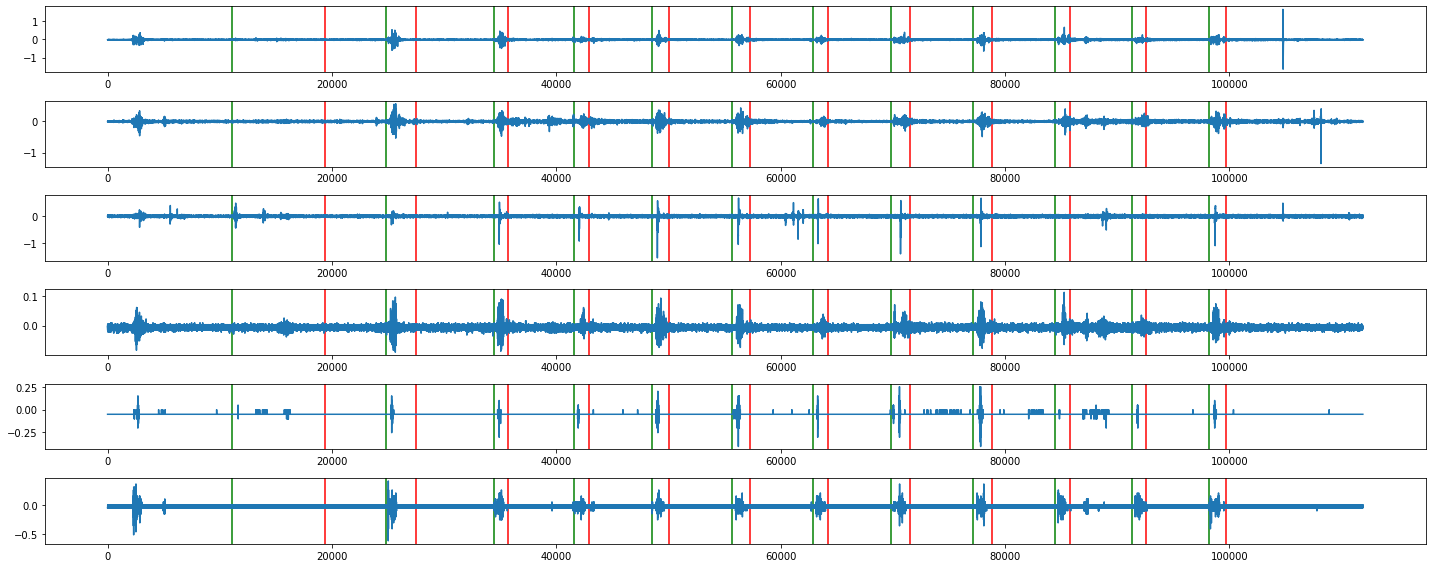

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from extract_data import extract_data



plt.figure(figsize=(20,8))
for i in range(6):
    plt.subplot(6,1,i+1)
    plt.plot(data_train[:,i]); plt.ylim(plt.ylim())
    plt.vlines(starts_train,-2,2,'g'); plt.vlines(ends_train,-2,2,'r')

plt.tight_layout()
plt.show()

In [23]:
print(starts_train)
print(ends_train)

[11051 24863 34414 41596 48539 55659 62883 69812 77113 84415 91329 98159]
[19367 27494 35662 42952 50053 57307 64226 71572 78836 85762 92582 99710]


In [24]:
#deleting indices :24863, 99710:

for i in range(len(filtered_data_train)):
    filtered_data_train[i] = filtered_data_train[i][24863:99710]

In [25]:
len(filtered_data_train[0])

74847

In [26]:
y_train = y_train[24863:99710]

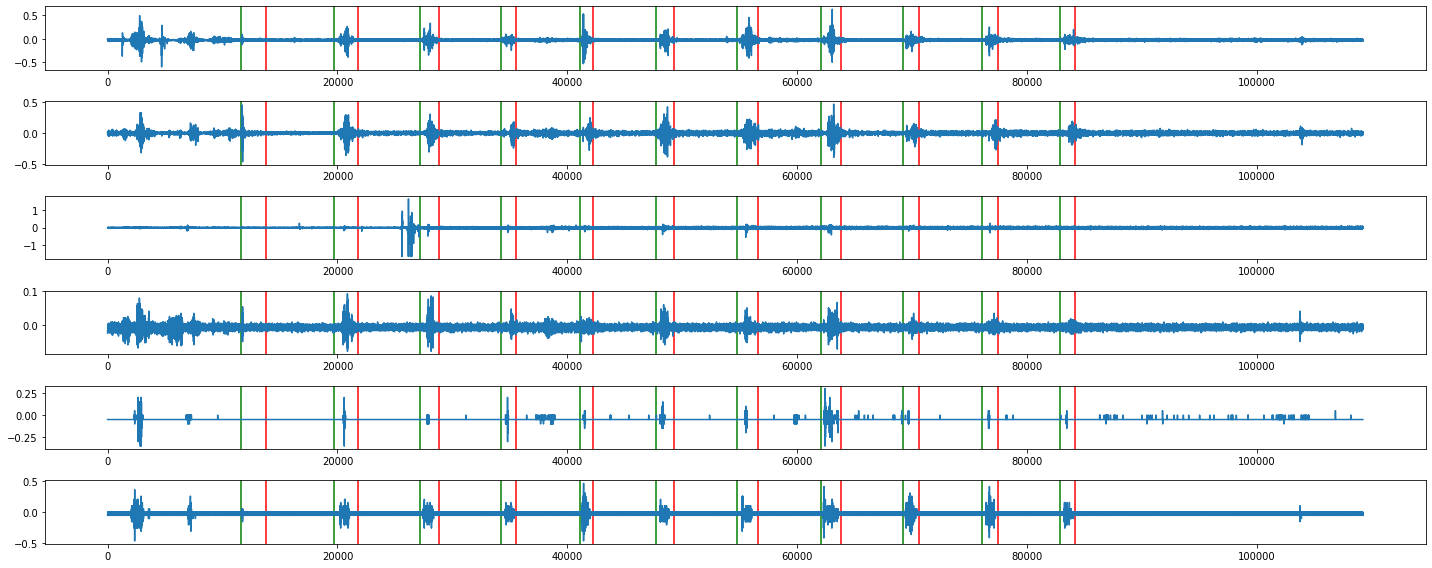

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from extract_data import extract_data



plt.figure(figsize=(20,8))
for i in range(6):
    plt.subplot(6,1,i+1)
    plt.plot(data_test[:,i]); plt.ylim(plt.ylim())
    plt.vlines(starts_test,-2,2,'g'); plt.vlines(ends_test,-2,2,'r')

plt.tight_layout()
plt.show()

In [27]:
print(starts_test)
print(ends_test)

[11587 19712 27165 34248 41075 47735 54765 62055 69190 76076 82846]
[13789 21760 28800 35544 42249 49262 56557 63766 70616 77417 84135]


In [28]:
#deleting indices :19712, 84135:

for i in range(len(filtered_data_test)):
    filtered_data_test[i] = filtered_data_test[i][19712:84135]

In [29]:
len(filtered_data_test[0])

64423

In [30]:
y_test = y_test[19712:84135]

### Downsampling y

In [31]:
 #large window to average over
window = 40
        
        #overlap interval
skip = 20
        
ind1 = 0
ind2 = window
y_train_new = np.zeros(int(len(y_train)/20)+1)
i = 0
while ind1 < len(y_train):
            
    #remaining data less than window size, avoid array out of bounds
    if ind2 > len(y_train):
        ind2 = len(y_train)
                
    num_label = np.count_nonzero(y_train[ind1:ind2])
    if num_label > 19:
        y_train_new[i] = 1
    ind1 = ind1 + skip
    ind2 = ind2 + skip
    i = i+1

In [32]:
 #large window to average over
window = 40
        
        #overlap interval
skip = 20
        
ind1 = 0
ind2 = window
y_test_new = np.zeros(int(len(y_test)/20)+1)
i = 0
while ind1 < len(y_test):
            
    #remaining data less than window size, avoid array out of bounds
    if ind2 > len(y_test):
        ind2 = len(y_test)
                
    num_label = np.count_nonzero(y_test[ind1:ind2])
    if num_label > 19:
        y_test_new[i] = 1
    ind1 = ind1 + skip
    ind2 = ind2 + skip
    i = i+1

In [33]:
print(len(y_train))
print(len(y_train_new))
print(len(y_test))
print(len(y_test_new))

74847
3743
64423
3222


### Smoothing data as described by SAD doc

In [34]:
def smooth(raw):
        
    #large window to average over
    window = 40
        
    #overlap interval
    skip = 20
        
    ind1 = 0
    ind2 = window
    copy = np.copy(np.array(raw))
    new = np.zeros(int(len(raw)/20)+1)
    i = 0
    while ind1 < len(raw):
            
        #remaining data less than window size, avoid array out of bounds
        if ind2 > len(raw):
            ind2 = len(raw)
                
        val = np.mean(copy[ind1:ind2], dtype=np.float64)
        new[i] = val
            
            
        ind1 = ind1 + skip
        ind2 = ind2 + skip
        i = i+1
    return new
    
def calculate(smoothed_envelope):
        
    return np.abs(np.diff(smoothed_envelope))

In [35]:
ready_data_train = [0,0,0,0,0,0]

for i in range(len(filtered_data_train)):
    res = smooth(filtered_data_train[i])
    ready_data_train[i] = calculate(res)

In [36]:
ready_data_test = [0,0,0,0,0,0]

for i in range(len(filtered_data_test)):
    res = smooth(filtered_data_test[i])
    ready_data_test[i] = calculate(res)

In [37]:
print(np.count_nonzero(ready_data_train[0]))
print(np.count_nonzero(ready_data_test[0]))

3742
3221


In [39]:
print(len(ready_data_train[0]))
print(len(ready_data_test[0]))

3742
3221


In [40]:
y_train_new = y_train_new[:3742]
print(len(y_train_new))
y_test_new = y_test_new[:3221]
print(len(y_test_new))

3742
3221


### Making dataframe and prepping for decision tree classifier

In [41]:
df_train = pd.DataFrame({
    
    "Chan1": ready_data_train[0],
    "Chan2": ready_data_train[1],
    "Chan3": ready_data_train[2],
    "Chan4": ready_data_train[3],
    "Chan5": ready_data_train[4],
    "Chan6": ready_data_train[5],
    "Y": y_train_new 
})

In [42]:
df_test = pd.DataFrame({
    
    "Chan1": ready_data_test[0],
    "Chan2": ready_data_test[1],
    "Chan3": ready_data_test[2],
    "Chan4": ready_data_test[3],
    "Chan5": ready_data_test[4],
    "Chan6": ready_data_test[5],
    "Y": y_test_new 
})

In [43]:
X_train = df_train[['Chan1', 'Chan2', 'Chan3', 'Chan4', 'Chan5', 'Chan6']]
y_train = df_train[['Y']]
X_test = df_test[['Chan1', 'Chan2', 'Chan3', 'Chan4', 'Chan5', 'Chan6']]
y_test = df_test[['Y']]

In [44]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [45]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [46]:
print(clf.score(X_test, y_test))

0.8040981061782055


In [47]:
print(np.mean(cross_val_score(clf, X_train, y_train)))

0.8008931695022955


In [48]:
predicted = clf.predict(X_test)

#I obtain the accuracy of this fold
ac=accuracy_score(predicted,y_test)
print(ac)
#I obtain the confusion matrix
cm=confusion_matrix(y_test, predicted)
print(cm)



0.8040981061782055
[[2307  152]
 [ 479  283]]
